In [33]:
import lime, shap
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.inspection import PartialDependenceDisplay
from sklearn.pipeline import make_pipeline
import tensorflow as tf
from tensorflow.keras import models,layers

In [34]:
df = pd.read_csv('iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [35]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [37]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [38]:
X = df.drop('Species',axis=1)
y = df['Species']

le = LabelEncoder()
y = le.fit_transform(y)


In [39]:
X_tr, X_te, y_tr, y_te = train_test_split(X,y,test_size=0.2,random_state=42)

In [40]:
model1 = LinearRegression()
model1.fit(X_tr,y_tr)

LinearRegression()

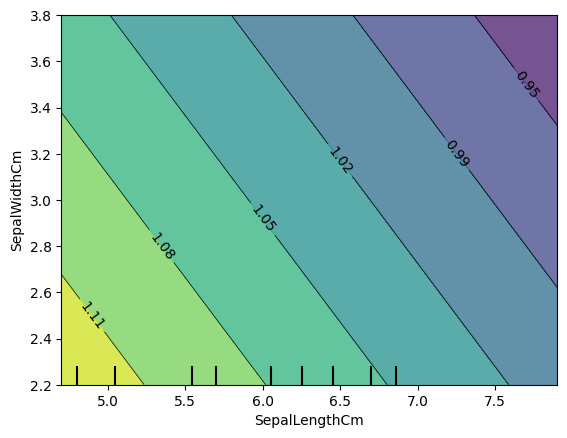

In [62]:
PartialDependenceDisplay.from_estimator(model1,X_te,[('SepalLengthCm','SepalWidthCm')],target=0)

In [41]:
model2 = LogisticRegression(max_iter=1000)
model2.fit(X_tr,y_tr)

LogisticRegression(max_iter=1000)

In [42]:
model3 = RandomForestClassifier()
model3.fit(X_tr,y_tr)

RandomForestClassifier()

In [43]:
shap_exp = shap.Explainer(model1,X_tr)
shap_val = shap_exp.shap_values(X_te)
shap_values = shap_exp(X_te)

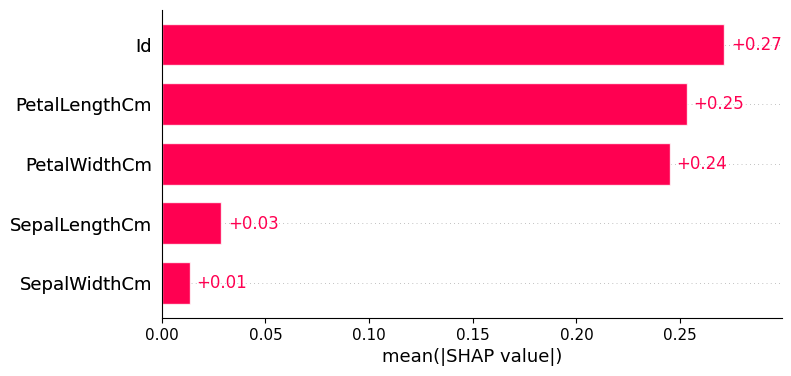

In [44]:
shap.plots.bar(shap_values)

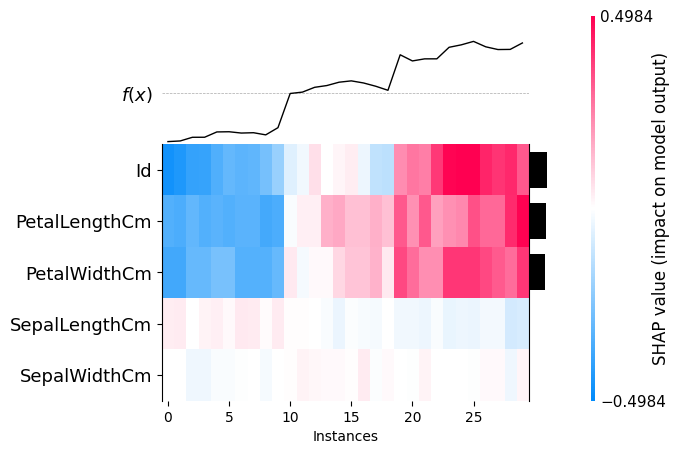

<Axes: xlabel='Instances'>

In [45]:
shap.plots.heatmap(shap_values)

E:\Xai_Req_Setup\.jupyter_env\temp\ipykernel_17060\1071796431.py:1: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values)


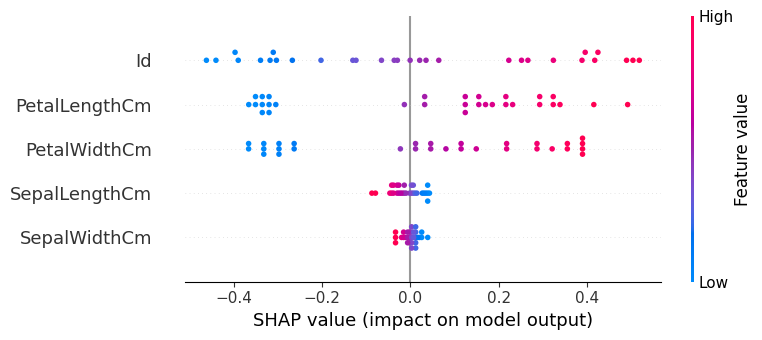

In [46]:
shap.summary_plot(shap_values)

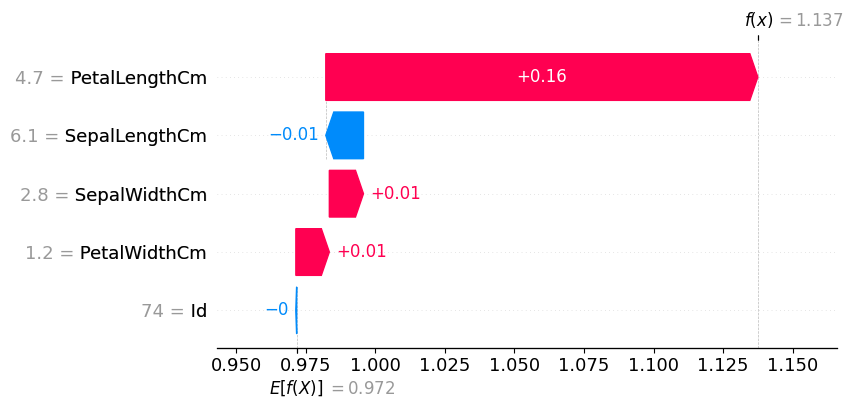

In [47]:
shap.plots.waterfall(shap_values[0])

In [48]:
shap.initjs()
shap.force_plot(shap_values)

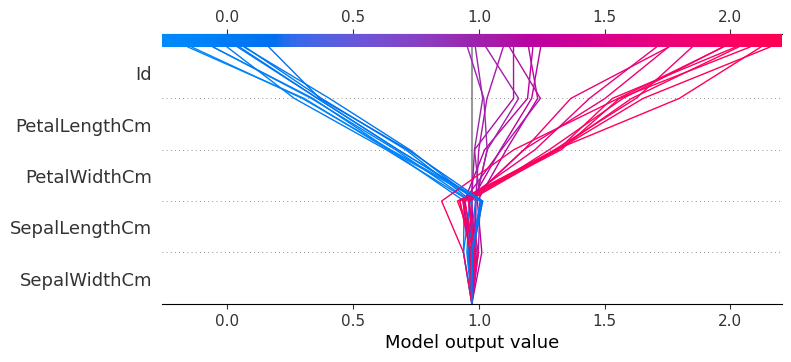

In [49]:
shap.decision_plot(shap_exp.expected_value, shap_val, X_te.iloc[2,:])

In [50]:
shap_ker = shap.KernelExplainer(model3.predict,X_tr)
shap_val = shap_ker(X_te)
shap_values = shap_ker.shap_values(X_te)

Using 120 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

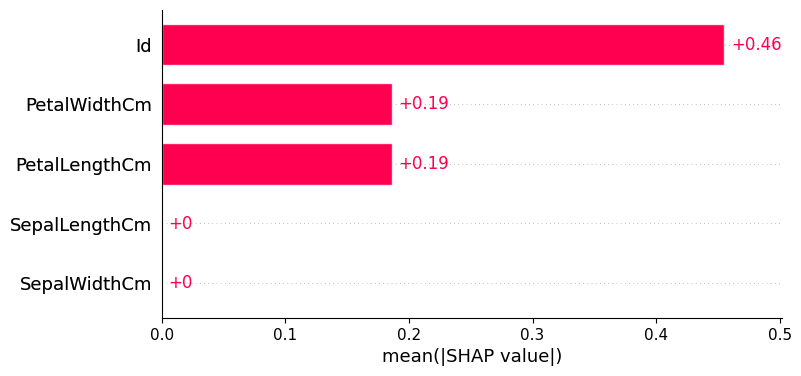

In [51]:
shap.plots.bar(shap_val)

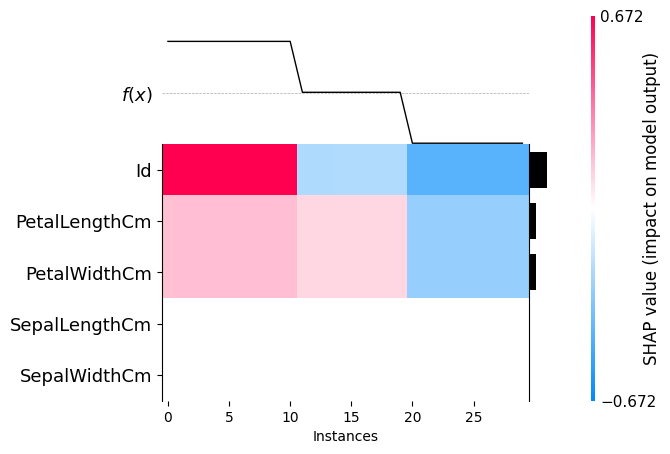

<Axes: xlabel='Instances'>

In [52]:
shap.plots.heatmap(shap_val)

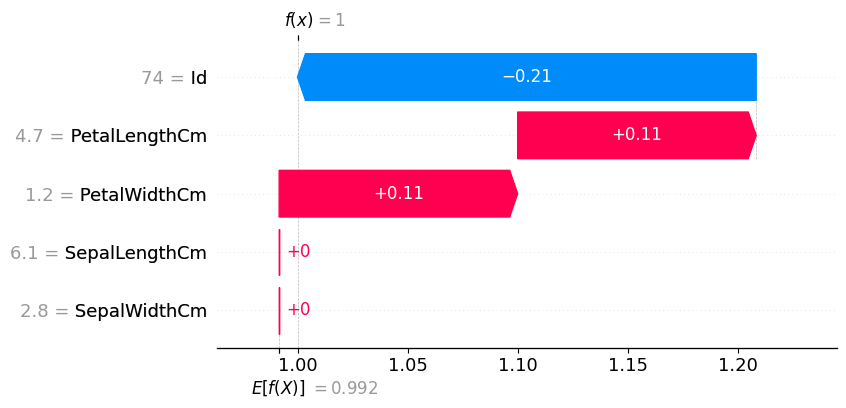

In [53]:
shap.plots.waterfall(shap_val[0])

E:\Xai_Req_Setup\.jupyter_env\temp\ipykernel_17060\3239088076.py:1: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_val)


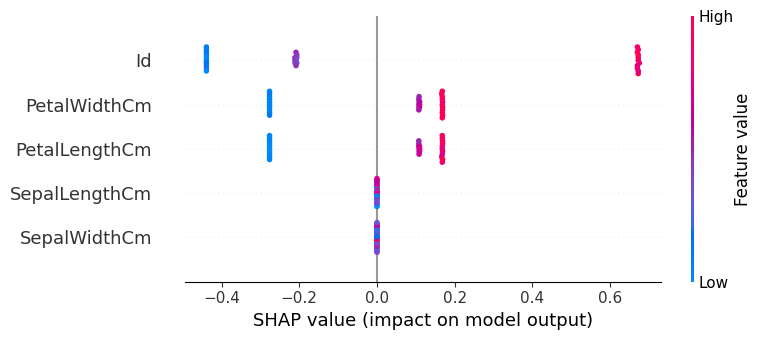

In [54]:
shap.summary_plot(shap_val)

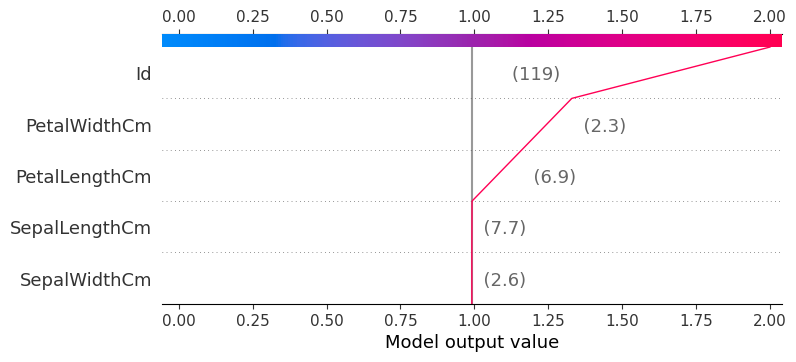

In [55]:
shap.decision_plot(shap_ker.expected_value, shap_values[2], X_te.iloc[2,:])

In [56]:
shap.initjs()
shap.force_plot(shap_val)

In [1]:
import tensorflow as tf

In [2]:
path = r'M:\train'

IMG_SIZE = (224,224)

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    path,
    subset='training',
    seed=42,
    batch_size=32,
    validation_split=0.2,
    image_size= IMG_SIZE,
    shuffle=True
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    path,
    subset='validation',
    seed=42,
    batch_size=32,
    validation_split=0.2,
    image_size= IMG_SIZE,
    shuffle=True
)


Found 5261 files belonging to 2 classes.
Using 4209 files for training.
Found 5261 files belonging to 2 classes.
Using 1052 files for validation.


In [3]:
train_len = len(train_ds)
val_len = len(val_ds)//2

val_ds = val_ds.take(val_len)
test_ds = val_ds.skip(val_len)

In [6]:
model = models.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(224,224,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.Flatten(),
    layers.Dense(2,activation='softmax')
])


E:\Xai_Req_Setup\Python3109\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
for img, lab in train_ds.take(1):
    bg = img[:1]
    image = img[1:5]
    break
bg = bg.numpy().astype(np.float32) / 255.0
image = image.numpy().astype(np.float32) / 255.0

shap_exp = shap.GradientExplainer(model, bg)


shap_values = shap_exp.shap_values(image)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-4.3655745685100555e-11..2.9103830456733704e-11].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.9103830456733704e-11..4.3655745685100555e-11].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-5.820766091346741e-11..4.3655745685100555e-11].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-5.820766091346741e-11..4.3655745685100555e-11].


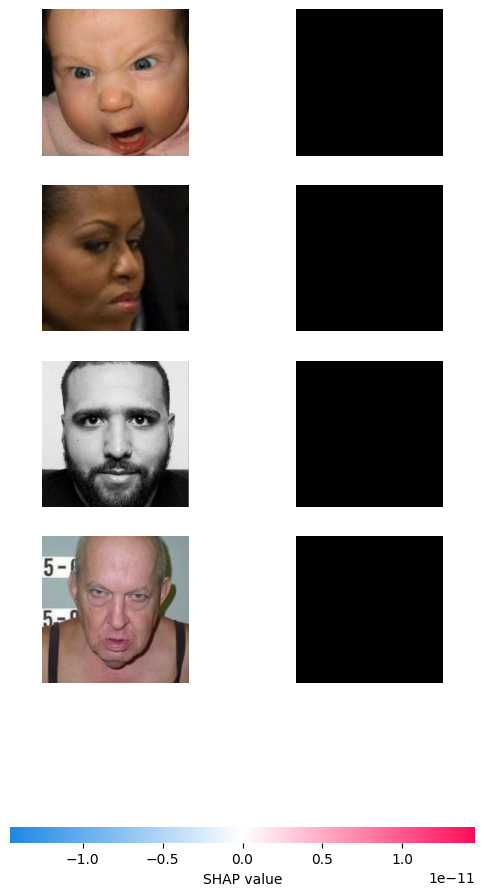

In [13]:

shap.image_plot(shap_values,image)

In [12]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import lime.lime_image
from skimage.segmentation import mark_boundaries
from tensorflow.keras.utils import to_categorical

# Load MNIST from npz
with np.load('mnist.npz') as data:
    x_train, y_train = data['x_train'], data['y_train']
    x_test, y_test = data['x_test'], data['y_test']

x_train = x_train[:800]
y_train = y_train[:800]
x_test = x_test[:200]
y_test = y_test[:200]

# Normalize and reshape
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = np.expand_dims(x_train, -1)  # (28,28,1)
x_test = np.expand_dims(x_test, -1)

# Convert to 3 channels for LIME (which expects RGB)
x_train_rgb = np.repeat(x_train, 3, axis=-1)
x_test_rgb = np.repeat(x_test, 3, axis=-1)

# Resize images to (224,224,3)
x_train_resized = tf.image.resize(x_train_rgb, (224, 224)).numpy()
x_test_resized = tf.image.resize(x_test_rgb, (224, 224)).numpy()


# Build CNN model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

E:\Xai_Req_Setup\Python3109\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 548ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

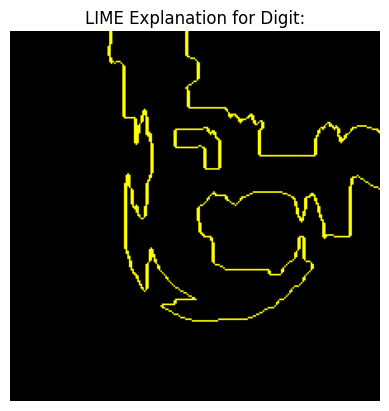

In [13]:

# Pick an image for LIME
idx = 100
image = x_test_resized[idx]

# Define prediction function for LIME
def predict_fn(images):
    return model.predict(images)

# Explain prediction
explainer = lime.lime_image.LimeImageExplainer()
explanation = explainer.explain_instance(
    image,
    predict_fn
)

# Visualize explanation
temp, mask = explanation.get_image_and_mask(
    label=explanation.top_labels[0]
)

plt.imshow(mark_boundaries(temp / 255.0, mask))
plt.title(f"LIME Explanation for Digit:")
plt.axis('off')
plt.show()

In [ ]:
bg = x_test_resized[:1] # 1 background image
image = x_test_resized[1:5] # 4 images to explain

explainer = shap.GradientExplainer(model, bg)
shap_values = explainer.shap_values(image)

preds = model.predict(image)
predicted_classes = np.argmax(preds, axis=1)

shap.image_plot(shap_values,image)

E:\Xai_Req_Setup\Python3109\lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_20
Received: inputs=['Tensor(shape=(4, 224, 224, 3))']
  warnings.warn(msg)
E:\Xai_Req_Setup\Python3109\lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_20
Received: inputs=['Tensor(shape=(50, 224, 224, 3))']
  warnings.warn(msg)


In [ ]:
bg = x_test_resized[:1] # 1 background image
image = x_test_resized[1:5] # 4 images to explain

explainer = shap.DeepExplainer(model, bg)
shap_values = explainer.shap_values(image)


shap.image_plot(shap_values,image)